<a name="anchorUp" />

<img src="PRJ-ECOBALYSE-00-LOGO.png" alt="Logo DataScientest" style="width:250px;height:auto;">

# FORMATION : DataScientest / Data Engineer
# PROJET (Nov. 2024) : Impact Textile avec EcoBalyse v2.4.0
# ETAPE 03 - Consommation Des Données - Visualisations - `Mode Basic`

## Temps Partiel (9 mois) - jan24_continu_de / cde_projet_ecobalyse

### [Dernière Mise A Jour du Document : Lun. 04/11/2024 - Version : 0.20](#anchorDown)
(Fichier : PRJ-ECOBALYSE-03-ETAPE-03-VISU-BASIC_v0-20.ipynb)

<div style="padding-right: 200px;">

---
    
</div>

<a name="summaryUp" />

## Sommaire

<div style="padding-right: 200px;">

[**Etape en cours**](#tdm-02)  
[**GitHub**](#tdm-03)  
[**VM DataScientest**](#tdm-04)
    
</div>

<div style="padding-right: 200px;">

[`Visualisations (Mode Basic)`](#tbm-10) 

- [**Explorer les impacts environnementaux des différents textiles**](#tbm-10-02)  
    - [Nombre de textiles par catégories](#tbm-10-02-01)
    - [Distribution de la variable 'ecs'](#tbm-10-02-02)
    - [Courbe d'estimation de densité de la variable 'ecs'](#tbm-10-02-03)
    - [Densité estimée & répartition cumulée de la variable 'ecs'](#tbm-10-02-04)
    - [Distribution de l'ecoscore 'ecs' par catégories](#tbm-10-02-05)
    - [Boxplot pour chaque catégorie](#tbm-10-02-06)
    - [Diagramme de dispersion : masse / ecs](#tbm-10-02-07)
    - [Diagramme en ligne : masse / ecs](#tbm-10-02-08)
    - [Diagramme de dispersion et ligne de régression : masse / ecs](#tbm-10-02-09)
    - [Diagramme en essaim : masse / ecs](#tbm-10-02-10)    
    - [Boxplot : mode / ecs](#tbm-10-02-11)    
    - [Boxplot : pays / ecs](#tbm-10-02-12)      
    - [Boxplot : business / ecs](#tbm-10-02-13)
    - [Boxplot : business / price](#tbm-10-02-14)    

</div>

### <a name="tdm-02" />[Etape en cours](#summaryUp)

<div style="padding-right: 200px;">

Visitez le site d'__Écobalyse__, [ici](https://ecobalyse.beta.gouv.fr/)<sup>1 , 2 , 3 , 4 , 5 , 6 , 7 , 8</sup>.

<i>En savoir plus</i> : <sup>1</sup>[Simulateur](https://ecobalyse.beta.gouv.fr/#/textile/simulator) , <sup>2</sup>[Explorateur](https://ecobalyse.beta.gouv.fr/#/explore/textile) , <sup>3</sup>[API](https://ecobalyse.beta.gouv.fr/#/api) , <sup>4</sup>[Documentation](https://fabrique-numerique.gitbook.io/ecobalyse) , <sup>5</sup>[GitHub](https://github.com/MTES-MCT/ecobalyse) , <sup>6</sup>[fashiongreenhub.org](https://www.fashiongreenhub.org/2023/08/31/lecobalyse-un-outil-pour-accelerer-la-mise-en-place-de-laffichage-environnemental/) , <sup>7</sup>[gorfou.fr](https://www.gorfou.fr/ecobalyse-calcule-vos-impacts-environnementaux/) , <sup>8</sup>[mtes-mct.github.io](https://mtes-mct.github.io/portail/startup/ecobalyse/)

</div>

<div style="padding-right: 200px;">

<b>- Etape :</b> 03  
    
<b>- Description :</b> Consommation des données (`Visualisations`) - Mode Basic
    
<b>- Objectif :</b>  
Dans cette étape, vous utiliserez les données pour modéliser des techniques de Machine Learning pour prédire l'impact environnemental de produits non couverts par l'API d'Ecobalyse.

Vous pourriez également créer un tableau de bord interactif avec `Dash` pour <b>visualiser les données</b> et permettre aux utilisateurs d'explorer les impacts environnementaux des différents produits.
    
<b>- Modules / MasterClass / templates :</b>  
DE120 - Machine Learning , `Dash`
    
<b>Conditions de validation du projet :</b>  
Notebook(s) de Prédictions ML | Visualisations  
    
</div>

### <a name="tdm-03" />[GitHub](#summaryUp)

<div style="padding-right: 200px;">  

Voir : `https://github.com/dte-thierry/prj_ECOBALYSE`

</div>

### <a name="tdm-04" />[VM DataScientest](#summaryUp)

<div style="padding-right: 200px;">

VM Ubuntu Server 20.04 LTS 16Go RAM 25Go DD : 
- *Voir :* `https://learn.datascientest.com/lesson/349/3682`  
&nbsp;

Recopier le dépôt GitHub sur la machine virtuelle :
- *Lancer :* `git clone https://github.com/dte-thierry/prj_ECOBALYSE.git`

</div>

### <a name="tbm-10" />[Visualisations (Mode Basic)](#summaryUp)

<div class="warning" style='background-color:#F3E2A9; color: #886A08; border-left: solid #886A08 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Constantes utiles pour la Visualisation Des Données Ecobalyse (Mode Basic)</b></p>
<p style='margin-left:1em;'>
    
- PROG_FULL_MODE = False 
- ECOBALYSE_VER = "v2.4.0" # en date du 30/10/2024  
- JSON_BASIC_FILE = "PRJ-ECOBALYSE-TEXTILES_basic.json" 
- JSON_FULL_FILE = "PRJ-ECOBALYSE-TEXTILES_full.json"

</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

In [1]:
# Charger les librairies utiles
import pandas as pd
import numpy as np
import os 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from datetime import datetime

# constantes 
PROG_FULL_MODE = False
ECOBALYSE_VER = "v2.4.0" # en date du 30/10/2024  
JSON_BASIC_FILE = "PRJ-ECOBALYSE-TEXTILES_basic.json" 
JSON_FULL_FILE = "PRJ-ECOBALYSE-TEXTILES_full.json"

# config. DataFrame : définir la largeur maximale des colonnes à None pour éviter la troncature
pd.set_option('display.max_colwidth', None)

# Activer le thème SeaBorn
sns.set_theme(style = "ticks", context = "talk", palette = "bright")

# date et heure du jour
NOW = datetime.now().strftime('%d-%m-%Y, %H:%M:%S')
print("Date, et heure :", NOW)

# Affichage du Mode d'extraction des données
if not PROG_FULL_MODE:
    print(f"\nMode d'Extraction Des Données Ecobalyse {ECOBALYSE_VER} : Basic. \nFichier JSON utilisé : {JSON_BASIC_FILE}")
elif PROG_FULL_MODE:
    print(f"\nMode d'Extraction Des Données Ecobalyse {ECOBALYSE_VER} : Complet. \nAjout et transformation de {PROG_NB_ITERATIONS} donnée(s) aléatoire(s), par catégorie(s) de textile(s). \nFichier JSON utilisé : {JSON_FULL_FILE}")
else:
    print("\nLa valeur de PROG_FULL_MODE n'est pas valide. Veuillez vérifier votre paramétrage ETL.")


Date, et heure : 04-11-2024, 08:32:45

Mode d'Extraction Des Données Ecobalyse v2.4.0 : Basic. 
Fichier JSON utilisé : PRJ-ECOBALYSE-TEXTILES_basic.json


#### <a name="tbm-10-02" />[Explorer les impacts environnementaux des différents textiles](#summaryUp)

<div style="padding-right: 200px;">

| Variable(s) | Description                                                                                                    |  
|-------------|----------------------------------------------------------------------------------------------------------------|
| ecs         | Ecoscore. Coût environnemental du textile, qui traduit le calcul d'impacts selon la méthode de l'Etat français | 
| masse       | Masse du produit fini, exprimée en kilogrammes. Min=0.01 kg                                                    |
| pays        | Liste des [pays](https://ecobalyse.beta.gouv.fr/#/explore/textile/countries) référencés dans Ecobalyse         |
| [business](https://ecobalyse.beta.gouv.fr/#/api)    | Type d'entreprise et d'offre de services : *small-business ┃ large-business-with-services ┃ large-business-without-services* <br /><br /> - **small-business:** PME/TPE <br /> - **large-business-with-services:** Grande entreprise avec service de réparation <br /> - **large-business-without-services (par défaut):** Grande entreprise sans service de réparation  |    
| price       | Prix du produit, en Euros (€). Min 1 ┃ Max 1000.                                                               |

</div>

In [2]:
# Définir le chemin d'entrée JSON en fonction du mode
if PROG_FULL_MODE:
    json_input_path = os.path.join('data', JSON_FULL_FILE)
else:
    json_input_path = os.path.join('data', JSON_BASIC_FILE)

# Récupérer le fichier JSON Lines (JSONL) et créer un DataFrame
df1 = pd.read_json(json_input_path, lines=True)

# config. DataFrame : revenir à la largeur par défaut des colonnes
pd.reset_option('display.max_colwidth')

# Affichage
# df1.head(4)

##### <a name="tbm-10-02-01" />[Nombre de textiles par catégories](#summaryUp)

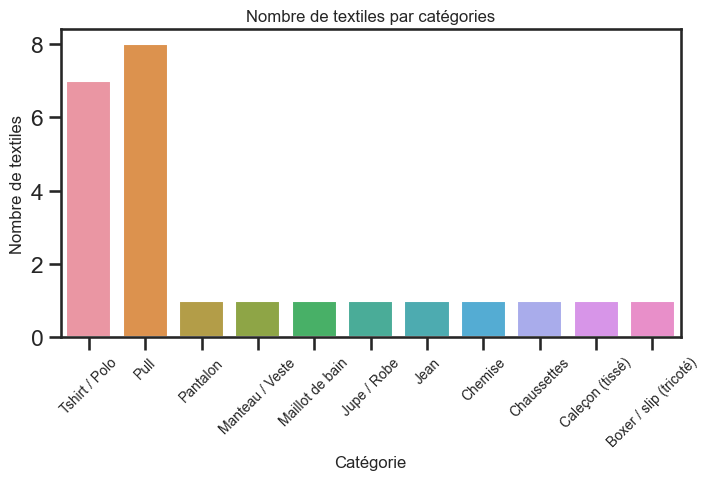

In [3]:
# Visualiser le nombre de textiles appartenant à chaque catégorie de la variable 'Categorie'

# Définir la taille du graphique
plt.figure(figsize=(8, 4))

# Créer le graphique avec les catégories triées par ordre alphabétique
sns.countplot(x="Categorie", data=df1, order=sorted(df1['Categorie'].unique(), reverse=True))

# Ajouter un titre avec une taille de police spécifique
plt.title('Nombre de textiles par catégories', fontsize=12)

# Ajouter des étiquettes pour les axes avec une taille de police spécifique
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Nombre de textiles', fontsize=12)

# Faire pivoter les étiquettes de l'axe des x pour éviter qu'elles ne se chevauchent
plt.xticks(rotation=45, fontsize=10)

# Afficher le graphique
plt.show()


##### <a name="tbm-10-02-02" />[Distribution de la variable 'ecs'](#summaryUp)

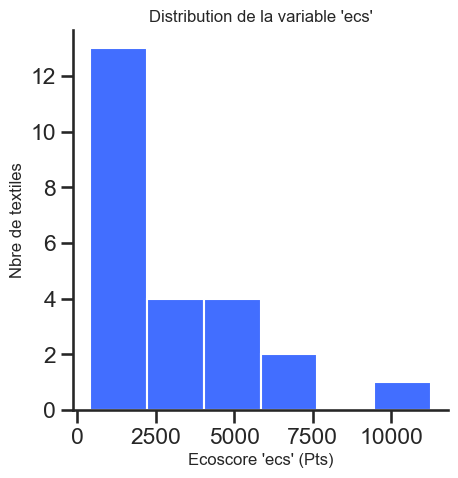

In [4]:
# Analyser la distribution de la variable 'ecs'.

# Définir la taille de la figure
sns.displot(df1['ecs'], height=5, aspect=1)   
  
# Ajouter un titre
plt.title("Distribution de la variable 'ecs'", fontsize=12) 

# Ajouter une étiquette pour l'axe x / l'axe y
plt.xlabel("Ecoscore 'ecs' (Pts)", fontsize=12)  
plt.ylabel('Nbre de textiles', fontsize=12)  

# Afficher le résultat
plt.show()

##### <a name="tbm-10-02-03" />[Courbe d'estimation de densité de la variable 'ecs'](#summaryUp)

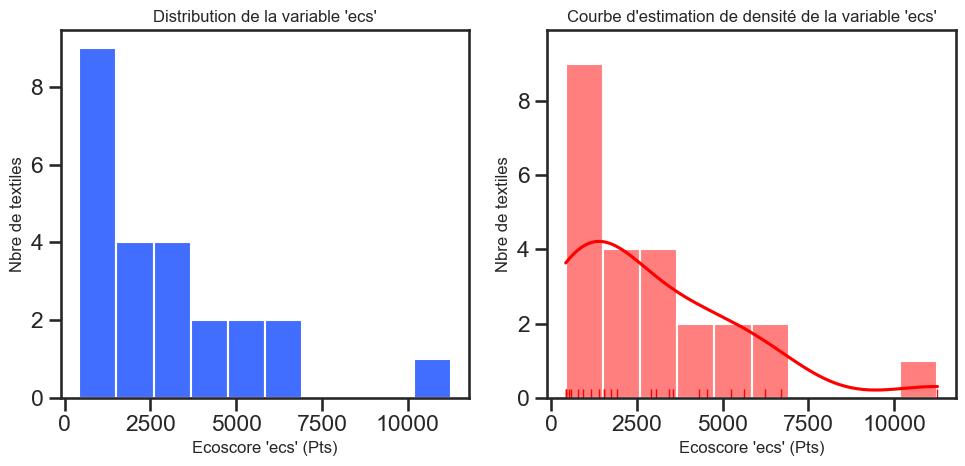

In [5]:
# Créer une figure et des axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 ligne, 2 colonnes

# Analyser la distribution de la variable 'ecs' sur le premier axe
sns.histplot(df1['ecs'], bins=10, ax=axs[0])   
axs[0].set_title("Distribution de la variable 'ecs'", fontsize=12)
axs[0].set_xlabel("Ecoscore 'ecs' (Pts)", fontsize=12)  
axs[0].set_ylabel('Nbre de textiles', fontsize=12)  

# Courbe d'estimation de la densité 'ecs' sur le deuxième axe
sns.histplot(df1['ecs'], kde=True, bins=10, color='red', ax=axs[1])
# Ajouter un rug plot
sns.rugplot(df1['ecs'], color='red', ax=axs[1])  
# Ajouter titre et étiquettes
axs[1].set_title("Courbe d'estimation de densité de la variable 'ecs'", fontsize=12)
axs[1].set_xlabel("Ecoscore 'ecs' (Pts)", fontsize=12)  
axs[1].set_ylabel('Nbre de textiles', fontsize=12)  

# Afficher le résultat
plt.tight_layout()
plt.show()

##### <a name="tbm-10-02-04" />[Densité estimée & répartition cumulée de la variable 'ecs'](#summaryUp)

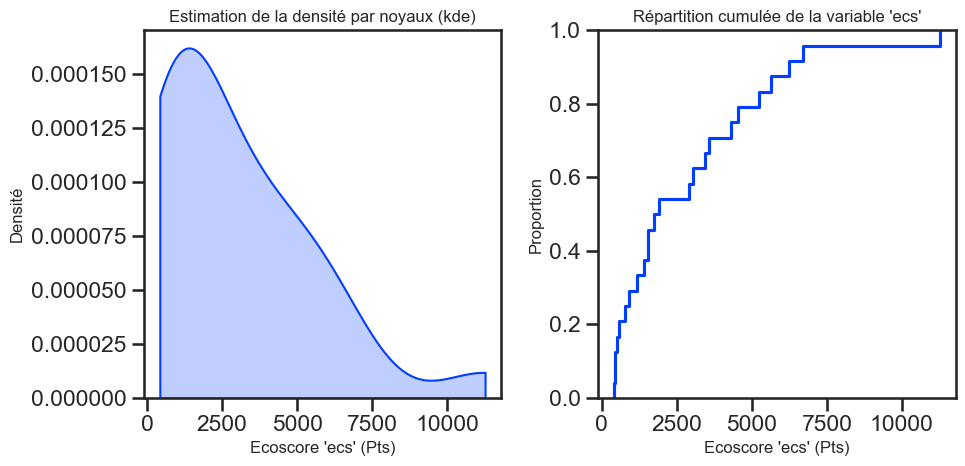

In [6]:
# Estimation de la densité par noyaux (kde), et répartitions cumulées empiriques (ECDF : empirical cumulative distribution functions).

# Créer une figure et des axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 ligne, 2 colonnes

# Estimation de la densité par noyaux (kde) de la variable 'ecs' sur le premier axe
# sns.histplot(df1['ecs'], bins=10, ax=axs[0]) 
sns.kdeplot(df1['ecs'], fill = True, cut = 0, ax=axs[0])
axs[0].set_title("Estimation de la densité par noyaux (kde)", fontsize=12)
axs[0].set_xlabel("Ecoscore 'ecs' (Pts)", fontsize=12)  
axs[0].set_ylabel('Densité', fontsize=12)  

# Répartition cumulée de la variable 'ecs' sur le deuxième axe
sns.ecdfplot(df1['ecs'], ax=axs[1])
# Ajouter titre et étiquettes
axs[1].set_title("Répartition cumulée de la variable 'ecs'", fontsize=12)
axs[1].set_xlabel("Ecoscore 'ecs' (Pts)", fontsize=12)  
axs[1].set_ylabel('Proportion', fontsize=12)  

# Afficher le résultat
plt.tight_layout()
plt.show()

<div class="warning" style='background-color:#DFF2BF; color: #4F8A10; border-left: solid #4F8A10 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Interprétation des courbes obtenues</b></p>
<p style='margin-left:1em;'>
    
Ces graphiques montrent : la distribution de la variable ‘ecs’ en utilisant une estimation de la densité par noyaux (kde).  
Ainsi que la répartition cumulée empirique (ECDF) de cette variable.

Concernant la distribution de la variable 'ecs', il y a une concentration élevée de valeurs autour de 2500 Pts.  
On observe que la plupart des valeurs ‘ecs’ sont concentrées vers les valeurs les plus basses (la zone sous la courbe représente la densité des valeurs).

Concernant la courbe ECDF (Empirical Cumulative Distribution Function) de distribution cumulative, elle commence à zéro et augmente par paliers pour atteindre 1.0 à droite. Cette courbe montre la proportion cumulative de l'ecoscore 'ecs'. 

Les paliers significatifs se trouvent autour de 2500, 5000, 7500, et juste avant 10000. On a un palier important à 2500, signifiant qu’une grande proportion des observations a une valeur ‘ecs’ inférieure ou égale à 2500 Pts. La courbe atteignant 1.0 indique que toutes les observations sont incluses à la fin. 

</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

##### <a name="tbm-10-02-05" />[Distribution de l'ecoscore 'ecs' par catégories](#summaryUp)

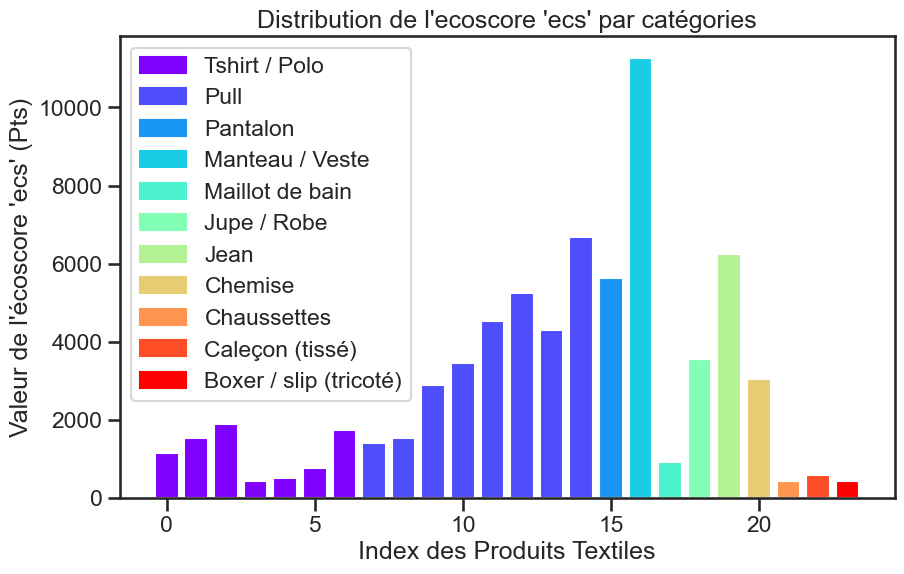

In [7]:
# Visualiser la distribution de l'ecoscore 'ecs' en fonction des catégories de textiles

# Obtenir les catégories uniques dans le dataframe
categories = df1['Categorie'].unique()

# Créer une liste de couleurs pour chaque catégorie
colors = plt.cm.rainbow(np.linspace(0, 1, len(categories)))

# Créer un dictionnaire pour mapper chaque catégorie à une couleur
color_dict = dict(zip(categories, colors))

plt.figure(figsize=(10, 6))

# Créer un graphique à barres avec une couleur différente pour chaque catégorie
plt.bar(range(len(df1)), df1['ecs'], color=df1['Categorie'].map(color_dict))

# Ajouter un titre
plt.title("Distribution de l'ecoscore 'ecs' par catégories")

# Ajouter des étiquettes pour les axes
plt.xlabel('Index des Produits Textiles')
plt.ylabel("Valeur de l'écoscore 'ecs' (Pts)")

# Ajouter une légende
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in categories]
plt.legend(handles, categories)

# Afficher le graphique
plt.show()

##### <a name="tbm-10-02-06" />[Boxplot pour chaque catégorie](#summaryUp)

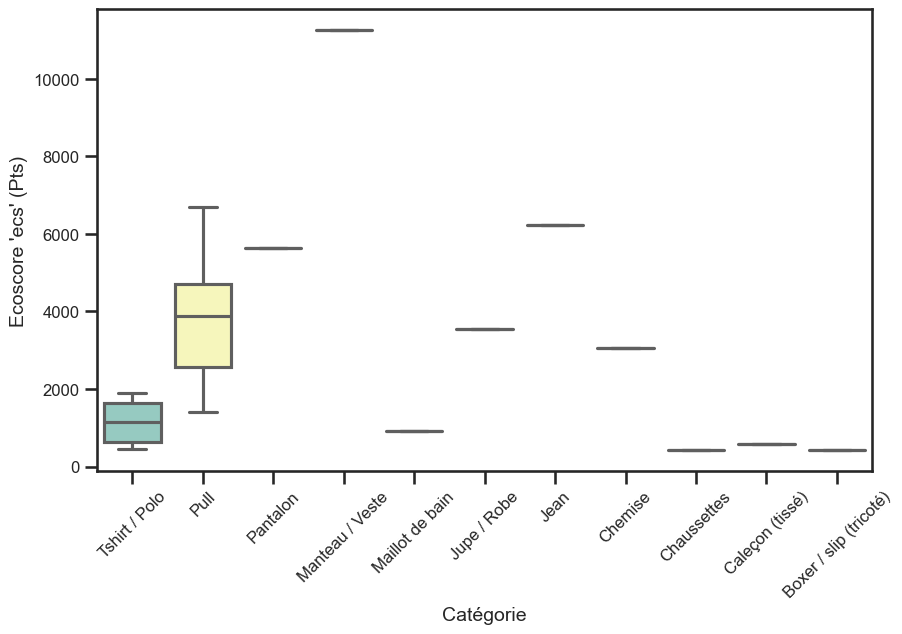

In [8]:
# Créer un boxplot pour chaque catégorie

plt.figure(figsize=(10,6))  # Augmenter la taille du graphique

# Différencier chaque catégorie avec des couleurs
sns.boxplot(x='Categorie', y='ecs', data=df1, palette='Set3')  

# Faire pivoter les étiquettes de catégorie
plt.xticks(rotation=45)  

# Utiliser une taille de police plus grande pour les étiquettes des graduations
plt.tick_params(labelsize=12)  

# Utiliser une taille de police plus grande pour les étiquettes des axes
plt.xlabel('Catégorie', fontsize=14)  
plt.ylabel("Ecoscore 'ecs' (Pts)", fontsize=14)

# Afficher le graphique
plt.show()

##### <a name="tbm-10-02-07" />[Diagramme de dispersion : masse / ecs](#summaryUp)

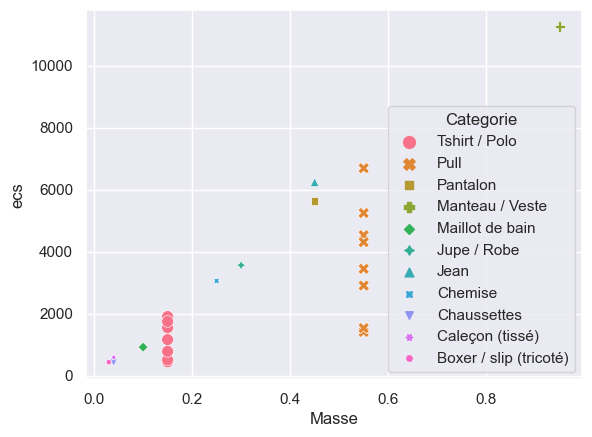

In [9]:
sns.set() # pour modifier le thème
sns.scatterplot(x = "Masse", y = "ecs", size = "Categorie", hue = "Categorie", style="Categorie", data = df1)
plt.show()

<div class="warning" style='background-color:#DFF2BF; color: #4F8A10; border-left: solid #4F8A10 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Interprétation du graphique</b></p>
<p style='margin-left:1em;'>
    
Chaque catégorie d’article (par exemple, Tshirt / Polo, Pull, Pantalon, etc.) est représentée par une couleur et une forme distinctes.
    
On peut comparer les différentes catégories d’articles en termes de masse et de valeur “ecs”.  
    
On observe une homogénéité de la distribution des données : les points pour une catégorie sont concentrés dans une certaine zone.  
    
Les points suivent une certaine direction, ce qui peut indiquer une corrélation entre ces deux variables : masse / ecs.

</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

##### <a name="tbm-10-02-08" />[Diagramme en ligne : masse / ecs](#summaryUp)

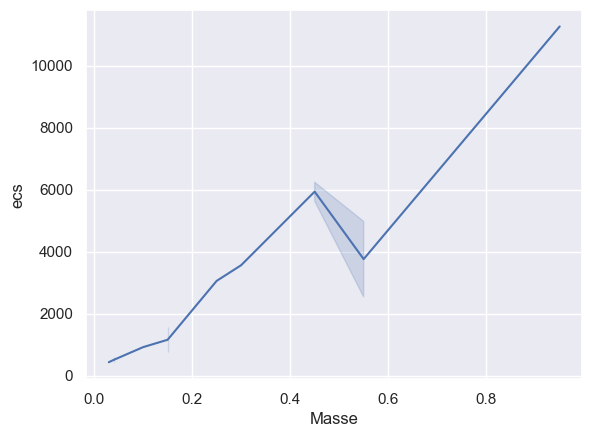

In [10]:
sns.lineplot(x = "Masse", y = "ecs", data = df1)
plt.show()

<div class="warning" style='background-color:#DFF2BF; color: #4F8A10; border-left: solid #4F8A10 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Interprétation du graphique</b></p>
<p style='margin-left:1em;'>
    
Ce __diagramme en ligne__ montre la relation entre la variable “Masse” (axe des x) et la variable “ecs” (axe des y).  
    
Le graphique montre une tendance générale positive, ce qui signifie que, globalement, à mesure que la masse augmente, la valeur “ecs” augmente également.  
    
Il y a des variations notables dans la courbe. Par exemple, après une augmentation initiale, il y a une baisse autour de 0.4 sur l’axe des x, suivie d’une nouvelle augmentation. Cela indique que la relation entre “Masse” et “ecs” n’est pas strictement linéaire et peut être influencée par d’autres facteurs. 
    
Les points d'inflexion où la courbe change de direction (par exemple, la baisse autour de 0.4 et la hausse après 0.6) peuvent être des points d’intérêt pour une analyse plus approfondie. Ils peuvent indiquer des seuils ou des transitions dans les données.  
    
Ce graphique suggère qu’il existe une corrélation positive entre la masse et la valeur “ecs”, mais cette relation est complexe et présente des variations. 

</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

##### <a name="tbm-10-02-09" />[Diagramme de dispersion et ligne de régression : masse / ecs](#summaryUp)

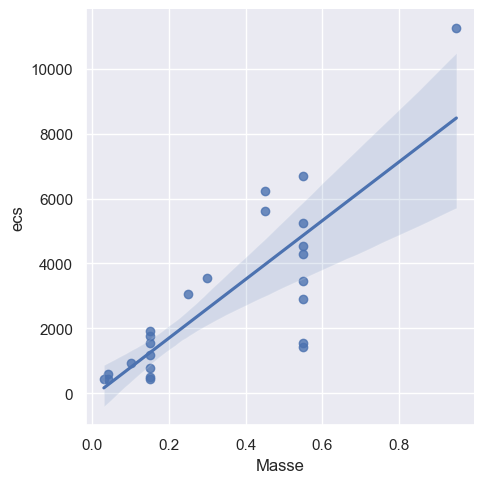

In [11]:
sns.lmplot(x = "Masse",y = "ecs",  data = df1)
plt.show()

<div class="warning" style='background-color:#DFF2BF; color: #4F8A10; border-left: solid #4F8A10 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Interprétation du graphique</b></p>
<p style='margin-left:1em;'>
    
La ligne de régression montre une __corrélation positive__ entre “Masse” et “ecs”. Cela signifie que, généralement, à mesure que la masse augmente, la valeur “ecs” augmente également.  
    
Les points individuels représentent les données réelles du dataframe. La dispersion des points autour de la ligne de régression montre la variabilité des données. 
    
La zone ombrée autour de la ligne de régression représente l’intervalle de confiance. Cela indique la fiabilité de la __prédiction__ de la ligne de régression. Plus la zone est étroite, plus la __prédiction__ est précise.  
    
Ce graphique suggère qu’il existe une relation linéaire entre la masse et la valeur “ecs”. 
    
Cependant, la dispersion des points montre qu’il y a une certaine variabilité, ce qui signifie que d’autres facteurs peuvent également influencer la valeur “ecs”.

</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

##### <a name="tbm-10-02-10" />[Diagramme en essaim : masse / ecs](#summaryUp)

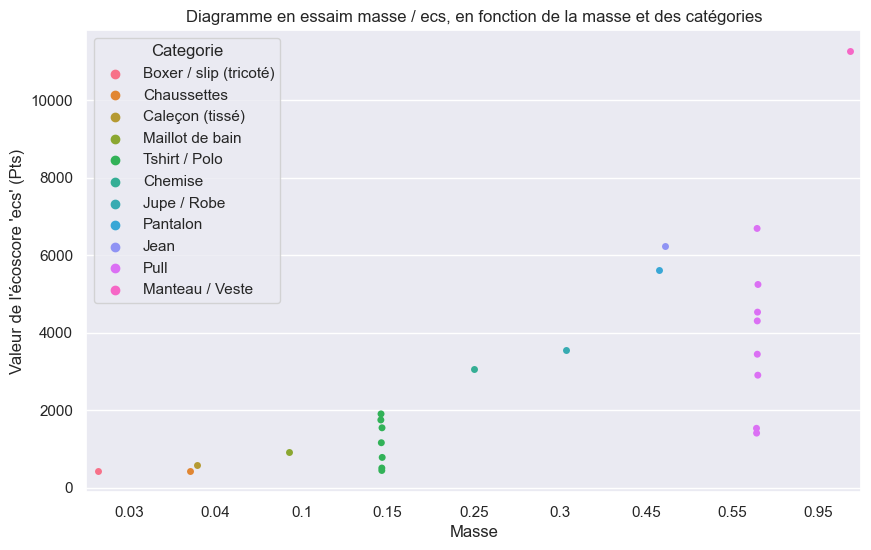

In [24]:
# Arrondir les valeurs de la colonne 'Masse' à 2 chiffres après la virgule
df1['Masse'] = df1['Masse'].round(2)

# Visualiser la distribution de l'ecoscore 'ecs' en fonction de la masse et des catégories de textiles
plt.figure(figsize=(10, 6))

# Créer un graphique stripplot avec jitter pour améliorer la lisibilité
sns.stripplot(x='Masse', y='ecs', hue='Categorie', data=df1, dodge=True, jitter=True)

# Ajouter un titre
plt.title("Diagramme en essaim masse / ecs, en fonction de la masse et des catégories")

# Ajouter des étiquettes pour les axes
plt.xlabel('Masse')
plt.ylabel("Valeur de l'écoscore 'ecs' (Pts)")

# Afficher le graphique
plt.show()

<div class="warning" style='background-color:#DFF2BF; color: #4F8A10; border-left: solid #4F8A10 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Interprétation du graphique</b></p>
<p style='margin-left:1em;'>

Ce graphique est utile pour visualiser la distribution des valeurs “ecs” en fonction de la masse pour différentes catégories d’articles. Il permet de voir les tendances, les concentrations et les variations au sein de chaque catégorie. 
    
Chaque point représente un article, et les points sont répartis le long de l’axe des x (Masse) pour chaque catégorie. Cela permet de visualiser comment les valeurs “ecs” varient avec la masse pour chaque catégorie.  
    
Les différentes couleurs représentent différentes catégories d’articles. On peut comparer les distributions de “ecs” pour chaque catégorie. 
    
La densité des points dans certaines zones peut indiquer des concentrations de valeurs. Cela peut indiquer une tendance ou une caractéristique commune pour cette catégorie.

</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

##### <a name="tbm-10-02-11" />[Boxplot : mode / ecs](#summaryUp)

<Figure size 1200x800 with 0 Axes>

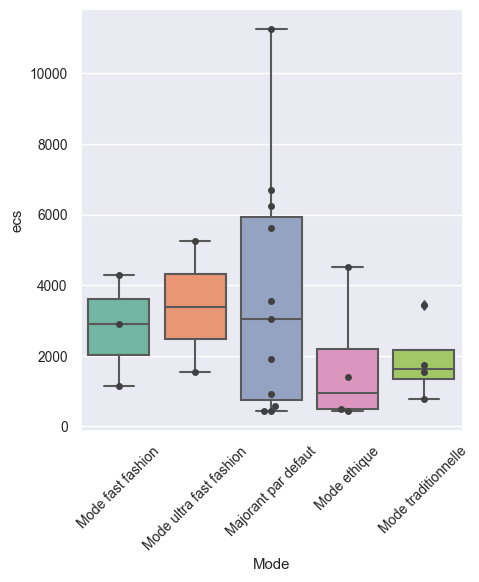

In [25]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=0.9)
# Ajouter des lignes de grille
# sns.set(style="whitegrid")
sns.catplot(x = "Mode", y = "ecs", data = df1, kind = "box", palette="Set2")
sns.swarmplot(x="Mode", y="ecs", data=df1, color=".25")
sns.despine()
plt.xticks(rotation=45)
plt.show()

<div class="warning" style='background-color:#DFF2BF; color: #4F8A10; border-left: solid #4F8A10 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Interprétation du graphique</b></p>
<p style='margin-left:1em;'>

Ce box plot est utile pour visualiser la distribution des valeurs “ecs” pour différents types de modes. Il permet de voir les tendances centrales, la dispersion et les valeurs aberrantes, ce qui peut être utile pour analyser l’impact environnemental des différents types de modes.
    
La ligne horizontale à l’intérieur de chaque boîte représente la __médiane__ des valeurs “ecs” pour chaque catégorie. Par exemple, la médiane pour la “Mode éthique” est plus basse que celle pour la “Mode ultra fast fashion”.  
    
Les extrémités de la boîte représentent le __premier quartile (Q1)__ et le __troisième quartile (Q3)__. Cela montre la dispersion des valeurs “ecs” autour de la médiane. Une boîte plus grande indique une plus grande dispersion des valeurs.
    
La distance entre Q1 et Q3, l'étendue interquartile (IRQ) donne une idée de la variabilité des valeurs “ecs” pour chaque type de mode.
    
Les points situés en dehors des “moustaches” (les lignes horizontales qui s’étendent des boîtes) sont des valeurs aberrantes. Par exemple, il y a des outliers pour la “Mode ultra fast fashion”.
    
La “Mode ultra fast fashion” semble avoir des valeurs “ecs” plus élevées et plus dispersées par rapport à la “Mode éthique”.

</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

##### <a name="tbm-10-02-12" />[Boxplot : pays / ecs](#summaryUp)

<Figure size 1200x800 with 0 Axes>

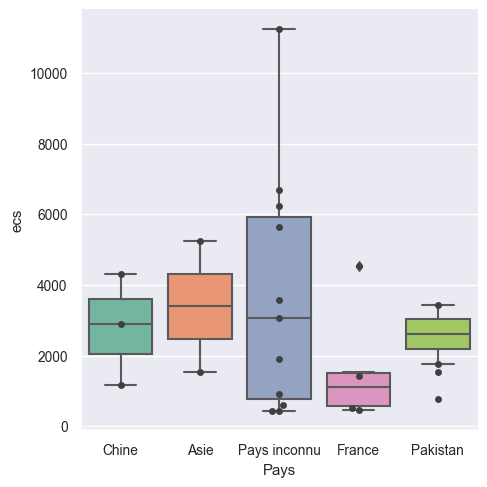

In [26]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=0.9)
sns.catplot(x = "Pays", y = "ecs", data = df1, kind = "box", palette="Set2")
sns.swarmplot(x="Mode", y="ecs", data=df1, color=".25")
# sns.despine()
plt.show()

<div class="warning" style='background-color:#DFF2BF; color: #4F8A10; border-left: solid #4F8A10 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:center'>
<b>Interprétation du graphique</b></p>
<p style='margin-left:1em;'>

Ce graphique combine un box plot et un swarm plot pour visualiser la distribution des valeurs “ecs” en fonction des [pays](https://ecobalyse.beta.gouv.fr/#/explore/textile/countries). 
    
Il permet de voir les tendances centrales, la dispersion et les valeurs aberrantes, ainsi que la densité des points individuels. Cela peut être utile pour analyser les différences entre les pays en termes de valeurs “ecs”.
    
On observe que la __médiane__ pour la Chine est plus élevée que celle pour la France. 
    
Il y a des outliers pour le Pakistan. 
    
Les points individuels représentent les valeurs réelles “ecs” pour chaque pays.  
    
La densité des points dans certaines zones peut indiquer des concentrations de valeurs. Par exemple, si un pays a beaucoup de points regroupés dans une certaine plage de valeurs “ecs”, cela peut indiquer une tendance ou une caractéristique commune pour ce pays. 

</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'> <b></b> <i></i>
</p></span>
</div>

##### <a name="tbm-10-02-13" />[Boxplot : business / ecs](#summaryUp)

<Figure size 1200x800 with 0 Axes>

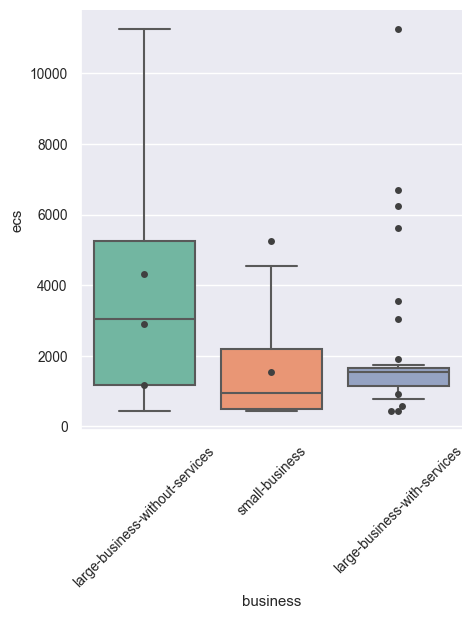

In [27]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=0.9)
sns.catplot(x = "business", y = "ecs", data = df1, kind = "box", palette="Set2")
sns.swarmplot(x="Mode", y="ecs", data=df1, color=".25")
# sns.despine()
plt.xticks(rotation=45)
plt.show()

##### <a name="tbm-10-02-14" />[Boxplot : business / price](#summaryUp)

<Figure size 1200x800 with 0 Axes>

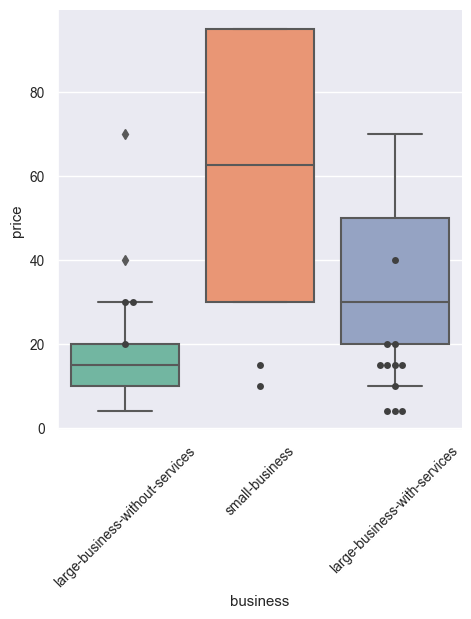

In [28]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=0.9)
sns.catplot(x = "business", y = "price", data = df1, kind = "box", palette="Set2")
sns.swarmplot(x="Mode", y="price", data=df1, color=".25")
# sns.despine()
plt.xticks(rotation=45)
plt.show()

###### <a name="anchorDown" />

##### [PROJET DATASCIENTEST (Nov. 2024) : Impact Textile avec EcoBalyse - Consommation Des Données - Visualisations (Mode Basic)](#anchorUp)